In [10]:
# some form of layer-wise learning

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def plot_prediction_and_error(x, y, model=None, yhat=None):
    if model:
        yhat = model.predict(x)

    yRes = y - yhat
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    axes[0].plot(x, y)
    axes[0].plot(x, yhat)
    axes[1].plot(x, yRes)
    plt.show()
    plt.close()

In [13]:
def gen_test_data():
#     x = np.linspace(-np.pi/2., np.pi/2., 100)
    x = np.linspace(-1, 1, 100)[:,np.newaxis]
    y = np.cos(20*x) + np.sin(10*x)
#     y = np.cos(50*x) + np.sin(5*x)

    noise = np.random.normal(0, 0.1, size=x.shape)

    return x, y + noise

x, y = gen_test_data()


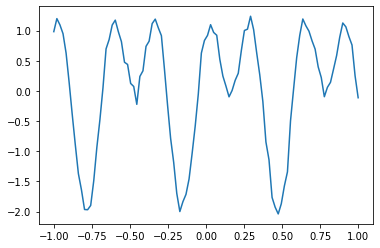

In [14]:
plt.figure()
plt.plot(x, y)
plt.show()
plt.close()

In [15]:
def get_base_model(x, y, verbose=True, batch_size=100, epochs=1000):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=verbose)
    
    return history, model

In [48]:
def get_later_model(x, y, verbose=True, batch_size=100, epochs=1000):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=verbose)
    
    return history, model

## using 2-step method

In [17]:
history, model = get_base_model(x, y, verbose=False)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
yhat = model.predict(x)

In [20]:
yRes = y-yhat

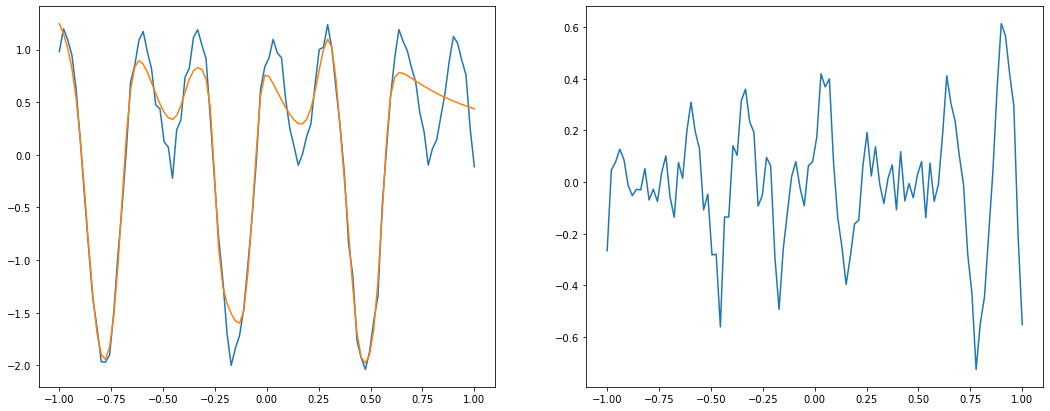

In [21]:
plot_prediction_and_error(x, y, model)

In [54]:
%%time
history2, model2 = get_later_model(x, yRes, False, epochs=10000)

CPU times: user 6min 51s, sys: 14.2 s, total: 7min 5s
Wall time: 1min 22s


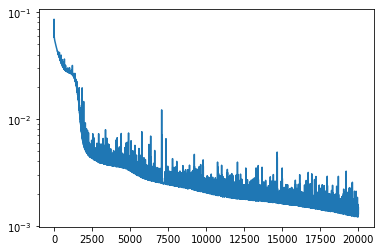

In [55]:
h2 = history2.history['loss']
plt.figure()
plt.plot(range(len(h2)), h2)
plt.yscale('log')

In [56]:
yhat2 = model2.predict(x)

In [57]:
yRes2 = yRes-yhat2

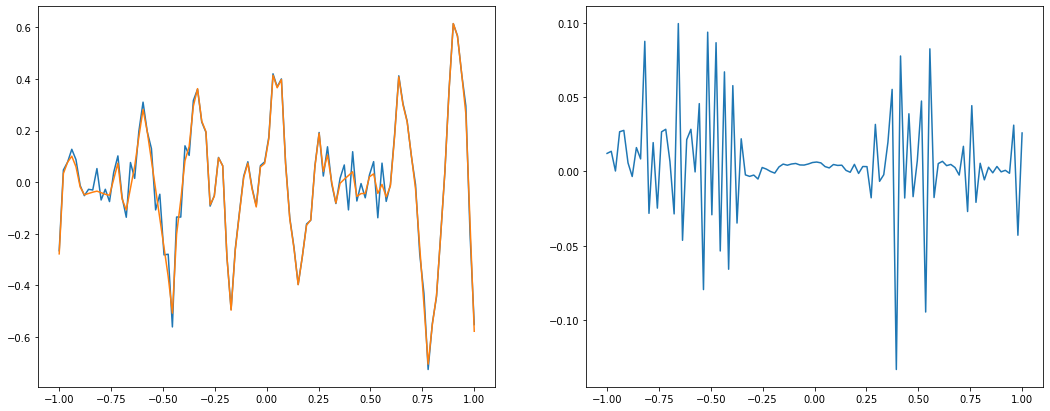

In [58]:
plot_prediction_and_error(x, yRes, model2)

In [59]:
yhat_multistep = model.predict(x) + model2.predict(x)

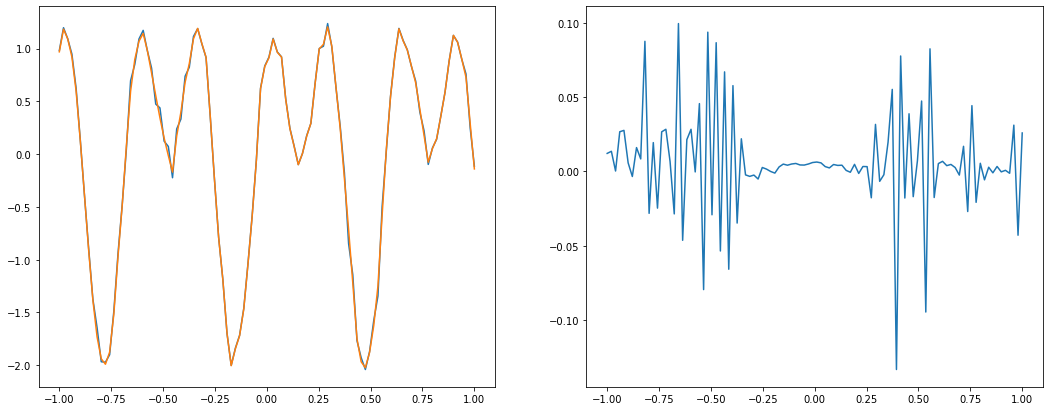

In [60]:
plot_prediction_and_error(x, y, model=None, yhat=yhat_multistep)

In [61]:
yhat_multistep_loss = tf.keras.losses.mean_squared_error(y, yhat_multistep)

(1e-12, 1)

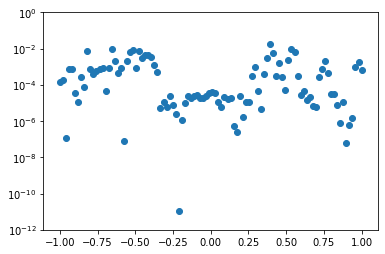

In [66]:
plt.figure()
plt.scatter(x, yhat_multistep_loss)
plt.yscale('log')
plt.ylim(1e-12, 1)

# layerwise learning